# Project Objective : Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis


# Problem Statement
In the fast-paced taxi booking sector, making most of the revenue is essential for long term success and driver hapiness. Our goal is to use data driven insights to maximise revenue streams for taxi drivers inorder to meet this need. Our research aims to determine whether payment menthods have an impact on fare pricing by focusing on the relationship between payement type and fare amount

# Objective

The project main goal is to run a A/B test to examine the relationship between the total fare and method of paymnet. We use python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay credit cards verses those who pay with cash.

# Research Question

Is there a relationship between total fare amount and paymnet type and can we nudge customers toward paymnet methods that generate higher revenue for drivers, without negatively impacting customer experience?

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats as st
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

# Loading the Dataset

In [ ]:
df = pd.read_csv('yellow_tripdata_2020-01.csv')

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Exploratory Data analysis

In [ ]:
df.shape # six million, four hundred five thousand, eight

(6405008, 18)

In [ ]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] =  pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'duration'],
      dtype='object')

In [ ]:
filtered_df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]  #get required columns

In [ ]:
filtered_df.isnull().sum() #missing values

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [ ]:
#percentage of null data in the original data
65441/len(df) * 100

1.021716132126611

In [ ]:
filtered_df.dropna(inplace=True)

In [ ]:
filtered_df['passenger_count'] = filtered_df['passenger_count'].astype('int64')
filtered_df['payment_type'] = filtered_df['payment_type'].astype('int64')

In [ ]:
#Drop duplicates
df[df.duplicated()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
6345634,NaN,2020-01-06 06:14:00,2020-01-06 07:03:00,NaN,21.69,NaN,NaN,72,116,NaN,47.08,2.75,0.5,0.0,6.12,0.3,56.75,0.0,49.000000
6345636,NaN,2020-01-06 06:52:00,2020-01-06 07:25:00,NaN,10.45,NaN,NaN,89,68,NaN,32.27,2.75,0.5,0.0,6.12,0.3,41.94,0.0,33.000000
6345638,NaN,2020-01-06 06:10:00,2020-01-06 06:46:29,NaN,8.70,NaN,NaN,76,45,NaN,38.27,2.75,0.0,0.0,0.00,0.3,41.32,0.0,36.483333
6345640,NaN,2020-01-06 06:11:00,2020-01-06 06:42:00,NaN,6.64,NaN,NaN,213,152,NaN,18.66,2.75,0.5,0.0,6.12,0.3,28.33,0.0,31.000000
6345642,NaN,2020-01-06 06:30:00,2020-01-06 07:11:00,NaN,12.76,NaN,NaN,169,249,NaN,51.05,2.75,0.5,0.0,0.00,0.3,54.60,0.0,41.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373809,NaN,2020-01-12 23:07:00,2020-01-12 23:19:00,NaN,5.93,NaN,NaN,52,14,NaN,20.87,2.75,0.5,0.0,0.00,0.3,24.42,0.0,12.000000
6373811,NaN,2020-01-12 23:19:00,2020-01-12 23:38:00,NaN,7.99,NaN,NaN,242,42,NaN,25.88,2.75,0.5,0.0,0.00,0.3,29.43,0.0,19.000000
6373813,NaN,2020-01-12 23:25:00,2020-01-12 23:56:00,NaN,-20.94,NaN,NaN,86,170,NaN,54.01,2.75,0.5,0.0,6.12,0.3,63.68,0.0,31.000000
6373815,NaN,2020-01-12 23:29:22,2020-01-12 23:45:44,NaN,3.37,NaN,NaN,107,256,NaN,24.06,2.75,0.0,0.0,0.00,0.3,27.11,0.0,16.366667


In [ ]:
filtered_df.shape

(6339567, 5)

In [ ]:
filtered_df.drop_duplicates(inplace=True)

In [ ]:
# payement type 1, 2 will be cash or card
filtered_df['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [ ]:
filtered_df = filtered_df[filtered_df['payment_type'] < 3]

In [ ]:
filtered_df['passenger_count'].value_counts(normalize=True) #Passenger count 0,7,8,9 are kind of outliers

passenger_count
1    0.580169
2    0.190808
3    0.066755
5    0.063666
6    0.039752
4    0.036218
0    0.022611
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [ ]:
 filtered_df = filtered_df[(filtered_df['passenger_count'] > 0) & (filtered_df['passenger_count'] <= 6)]

In [ ]:
filtered_df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [ ]:
filtered_df.describe() # remove negative value cause min tri_distance,duration,fare_amount cannot be neagtive

,passenger_count,fare_amount,trip_distance,duration
count,2.965270e+06,2.965270e+06,2.965270e+06,2.965270e+06
mean,1.863927e+00,1.756830e+01,4.462182e+00,2.384796e+01
std,1.439961e+00,1.493143e+01,4.857628e+00,9.191509e+01
min,0.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,8.500000e+00,1.470000e+00,9.683333e+00
50%,1.000000e+00,1.300000e+01,2.670000e+00,1.550000e+01
75%,2.000000e+00,2.050000e+01,5.330000e+00,2.311667e+01
max,9.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [ ]:
filtered_df = filtered_df[filtered_df['fare_amount'] > 0]
filtered_df = filtered_df[filtered_df['trip_distance'] > 0]
filtered_df = filtered_df[filtered_df['duration'] > 0]

In [ ]:
filtered_df.describe() #descriptive statistics helps in identifying outliers

,passenger_count,fare_amount,trip_distance,duration
count,2.932570e+06,2.932570e+06,2.932570e+06,2.932570e+06
mean,1.870109e+00,1.743256e+01,4.507063e+00,2.387730e+01
std,1.443469e+00,1.434906e+01,4.859867e+00,9.202326e+01
min,0.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,8.500000e+00,1.500000e+00,9.750000e+00
50%,1.000000e+00,1.300000e+01,2.700000e+00,1.551667e+01
75%,2.000000e+00,2.050000e+01,5.400000e+00,2.308333e+01
max,9.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


{'whiskers': [<matplotlib.lines.Line2D at 0x7a0cc45d89d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a0cc45d8f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a0cc45d8430>],
 'medians': [<matplotlib.lines.Line2D at 0x7a0cc45d9450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a0cc45d96f0>],
 'means': []}

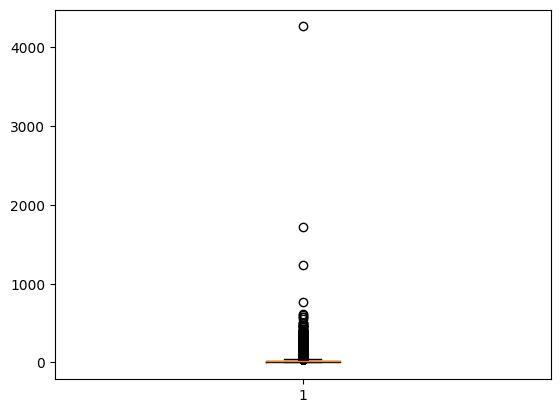

In [ ]:
# remove Outliers either Z score or inter Quartile range
# as the data is not normalized lets go head and use IQR
plt.boxplot(filtered_df['fare_amount'])

In [ ]:
for col in ['fare_amount','trip_distance','duration']:
  q1 = filtered_df[col].quantile(0.25)
  q3 = filtered_df[col].quantile(0.75)
  IQR = q3 - q1

  lower_bound = q1 - 1.5 * IQR
  upper_bound = q3 + 1.5 * IQR
  filtered_df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]

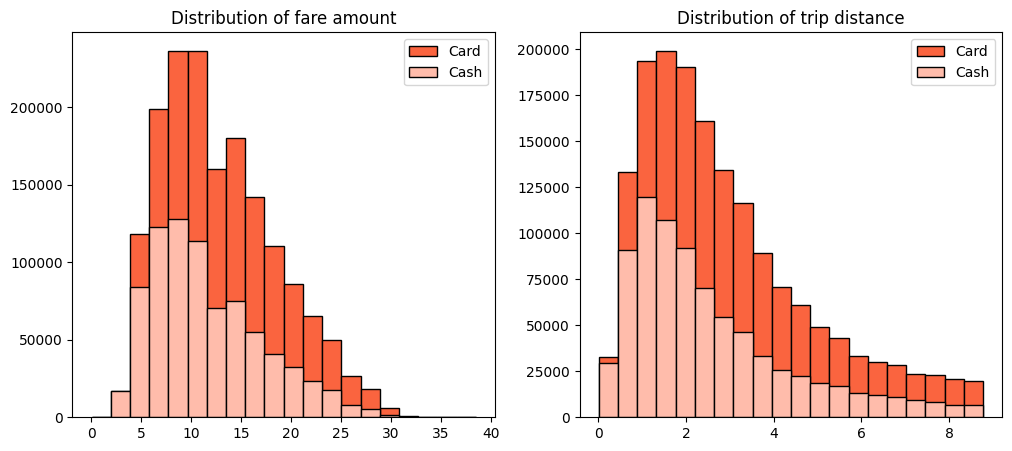

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(filtered_df[filtered_df['payment_type']=='Card']['fare_amount'],histtype='barstacked', bins=20,edgecolor = 'k',color='#FA643F',label='Card')
plt.hist(filtered_df[filtered_df['payment_type']=='Cash']['fare_amount'],histtype='barstacked', bins=20,edgecolor = 'k',color='#FFBCAB',label='Cash')
plt.legend()
plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(filtered_df[filtered_df['payment_type']=='Card']['trip_distance'],histtype='barstacked', bins=20,edgecolor = 'k',color='#FA643F',label='Card')
plt.hist(filtered_df[filtered_df['payment_type']=='Cash']['trip_distance'],histtype='barstacked', bins=20,edgecolor = 'k',color='#FFBCAB',label='Cash')
plt.legend()
plt.show()

In [ ]:
filtered_df.groupby('payment_type').agg({'fare_amount': ['mean','std'], 'trip_distance': ['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           12.874180  5.741632      2.913070  1.939895
Cash           11.592357  5.518126      2.547011  1.867736

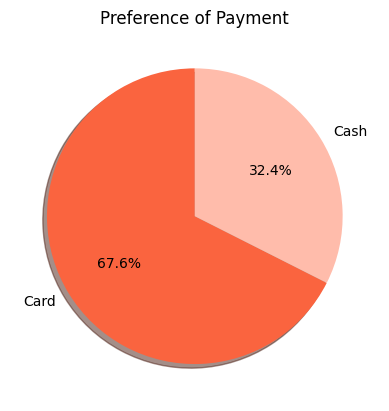

In [ ]:
plt.title("Preference of Payment")
plt.pie(filtered_df['payment_type'].value_counts(normalize=True), labels = filtered_df['payment_type'].value_counts().index, startangle=90,shadow=True,
        autopct='%1.1f%%',colors=['#FA643F','#FFBCAB'])
plt.show()

In [ ]:
passenger_count = filtered_df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={"passenger_count":'count'},inplace=True)
passenger_count.reset_index(inplace=True)

In [ ]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum()) * 100

In [ ]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,902032,37.713379
1,Card,2,326220,13.639049
2,Card,3,122025,5.101787
3,Card,4,63481,2.654100
4,Card,5,123661,5.170187
5,Card,6,77511,3.240685
6,Cash,1,458052,19.150860
7,Cash,2,154897,6.476144
8,Cash,3,54355,2.272548
9,Cash,4,32620,1.363821


In [ ]:
new_df = pd.DataFrame(columns=['payment_type',1,2,3,4,5,6])
new_df['payment_type'] = ['Card','Cash']
new_df.iloc[0,1:] = passenger_count.iloc[0:6,-1]
new_df.iloc[1,1:] = passenger_count.iloc[6:,-1]
new_df

,payment_type,1,2,3,4,5,6
0,Card,37.713379,13.639049,5.101787,2.6541,5.170187,3.240685
1,Cash,19.15086,6.476144,2.272548,1.363821,1.985777,1.231662


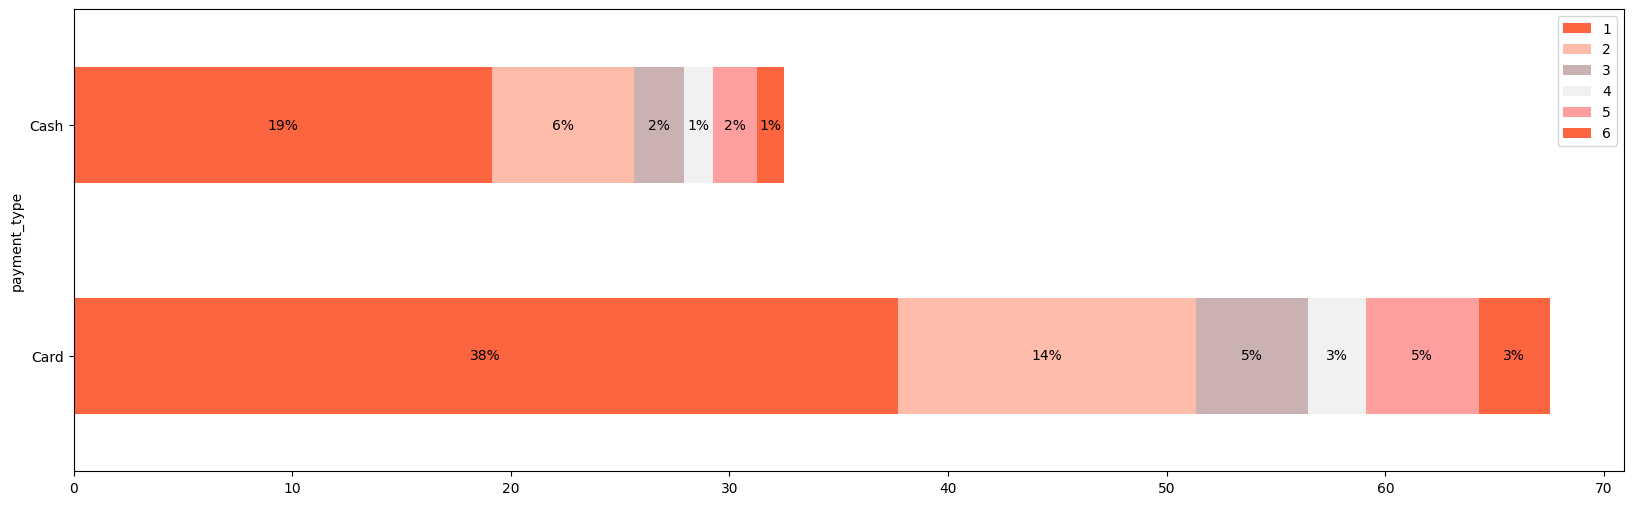

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))
new_df.plot(x='payment_type',kind='barh',stacked=True,ax=ax,color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])

#add percentages
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x,y = p.get_xy()
  ax.text(x + width / 2, y + height / 2,'{:.0f}%'.format(width),horizontalalignment='center',verticalalignment='center')

## Hypothesis Testing

**Null hypothesis:** there is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternate hypothesis:** There is a difference in average fare between customers who use credit cards and customers who use cash



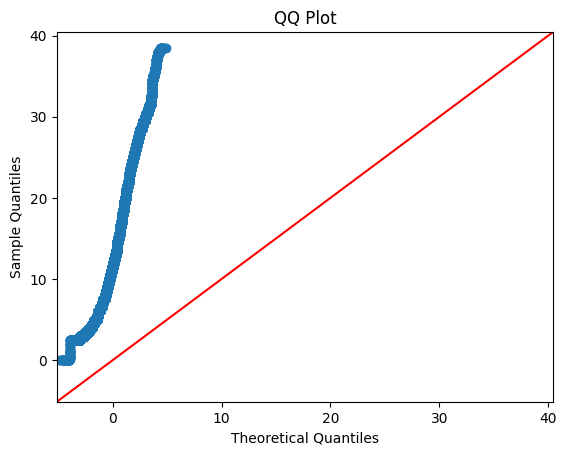

In [ ]:
# here we are comparing two different independent samples and in that fair amount is continuous
# in order to perform Z test data needs to be large and normally distributed and populationstandard deviation should be known
#Let's plot QQ plot to know whether the data is normally distributed
sm.qqplot(filtered_df['fare_amount'], line ='45')
plt.title('QQ Plot')
plt.show()

In [ ]:
# Data is not normally distributed so T-test
card_sample = filtered_df[filtered_df['payment_type'] == 'Card']['fare_amount']
cash_sample = filtered_df[filtered_df['payment_type'] == 'Cash']['fare_amount']

In [ ]:
t_stats,p_value = st.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)
print('T statistic',t_stats,'p-value',p_value)

T statistic 165.6989722565007 p-value 0.0


In [ ]:
#p < 0.05(significance value) so reject Null hypothesis

# Regression Analysis

Implemented linear regression to explore the relationship between trip duration (calculated from pickup and drop off times) and fare amount

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 7.878e+06
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        04:21:40   Log-Likelihood:            -5.8173e+06
No. Observations:             2391809   AIC:                         1.163e+07
Df Residuals:                 2391807   BIC:                         1.163e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5312      0.004    638.092      0.0

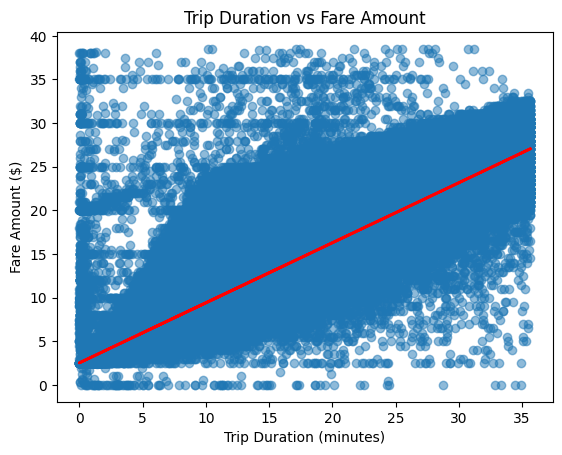

In [ ]:
# Define independent variable (X) and dependent variable (y)
X = filtered_df['duration']
y = filtered_df['fare_amount']

# Add a constant to the independent variable (for intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Plot the data and the regression line
plt.scatter(filtered_df['duration'], filtered_df['fare_amount'], alpha=0.5)
plt.plot(filtered_df['duration'], model.predict(X), color='red', linewidth=2)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.title('Trip Duration vs Fare Amount')
plt.show()